# **Predicting the level of Solar Radiation.**

### In this project we are provided with a dataset which contains temperature, pressure humidity etc., and we have to predict the level of solar radiation using these features. In this project we are using linear regression algorithm.

## Importing the libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the data :

In [ ]:
df = pd.read_csv('SolarPrediction.csv')

In [ ]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
df.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

## Exploratory Data Analysis :

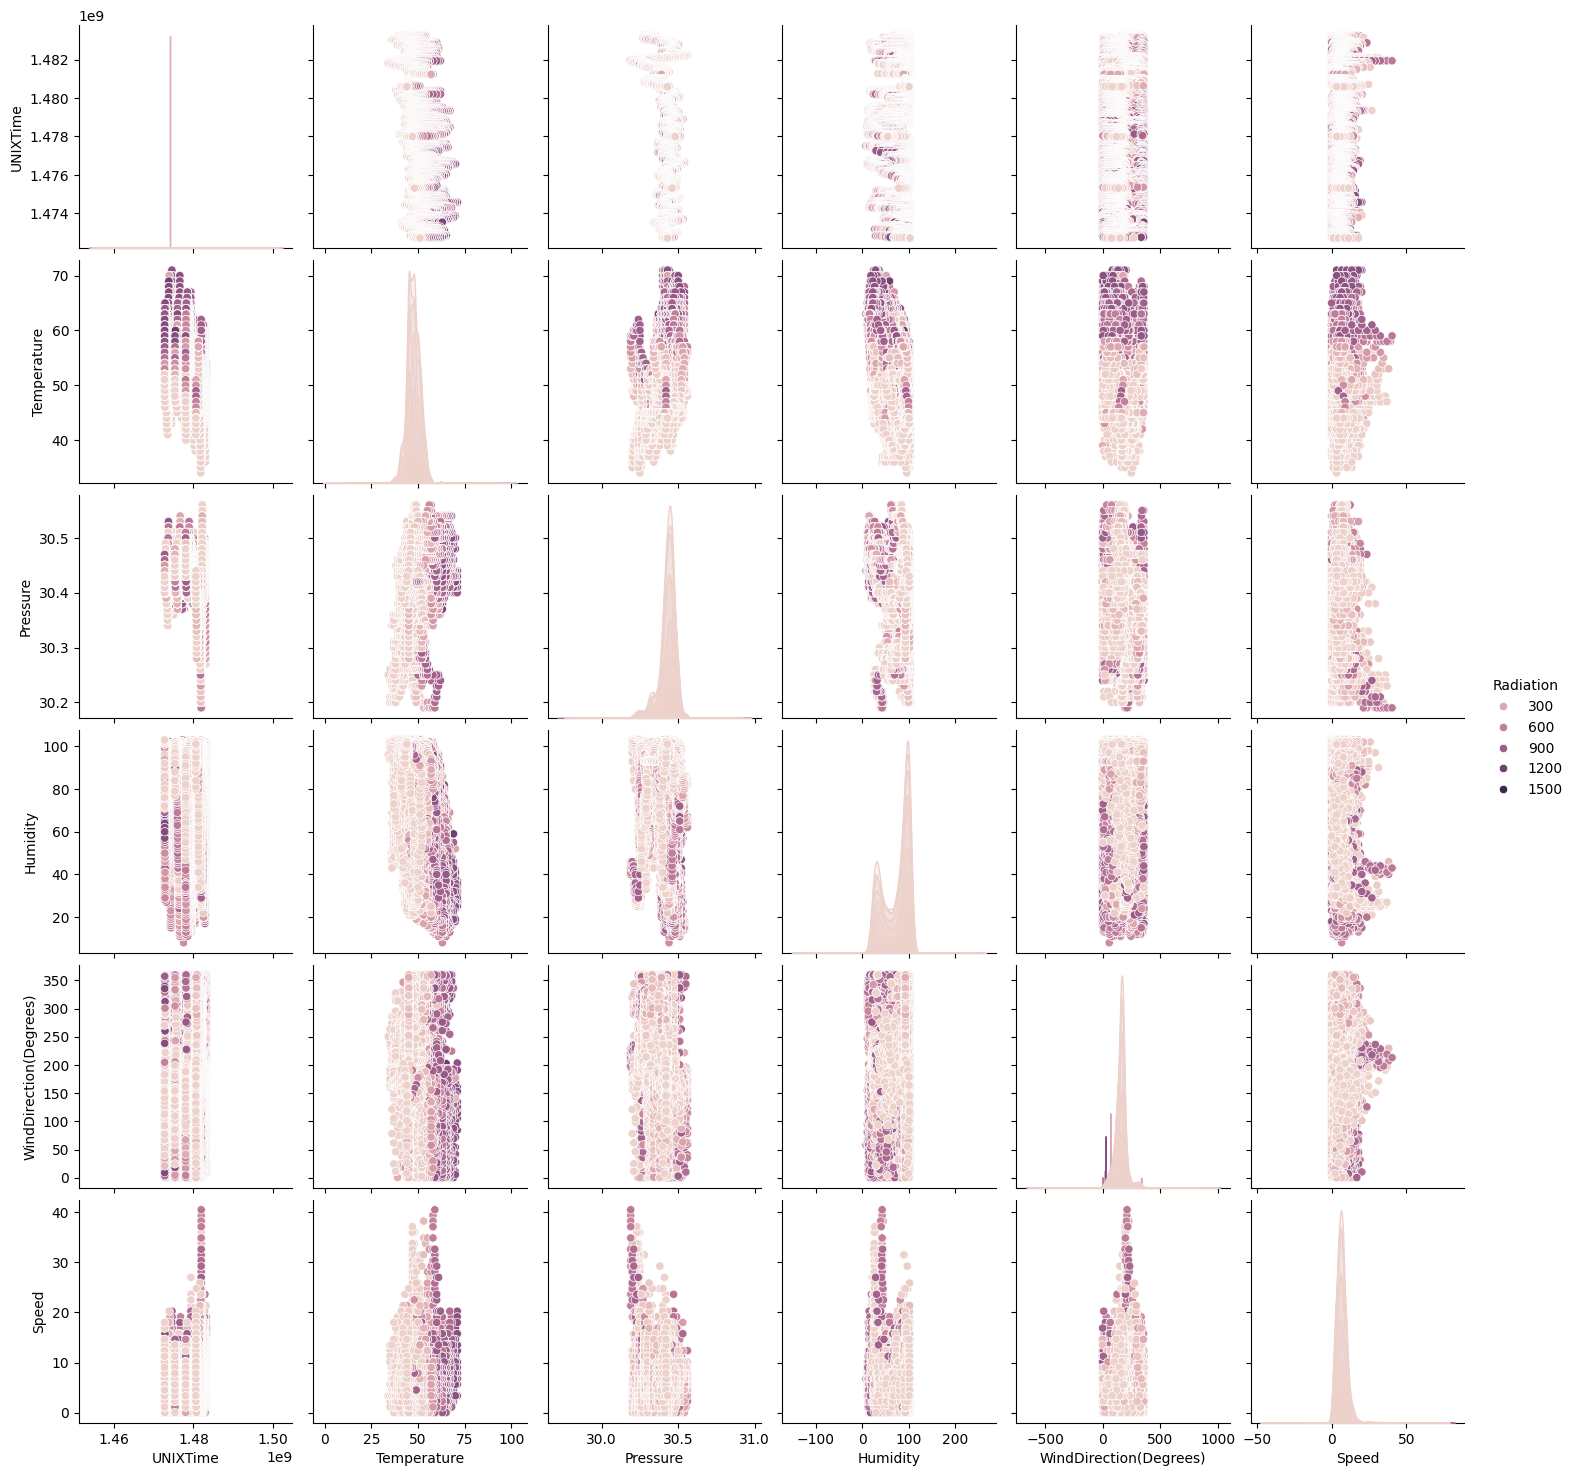

In [ ]:
sns.pairplot(df, hue = 'Radiation')
plt.show()

## Correlation :

In [ ]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


<ipython-input-18-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

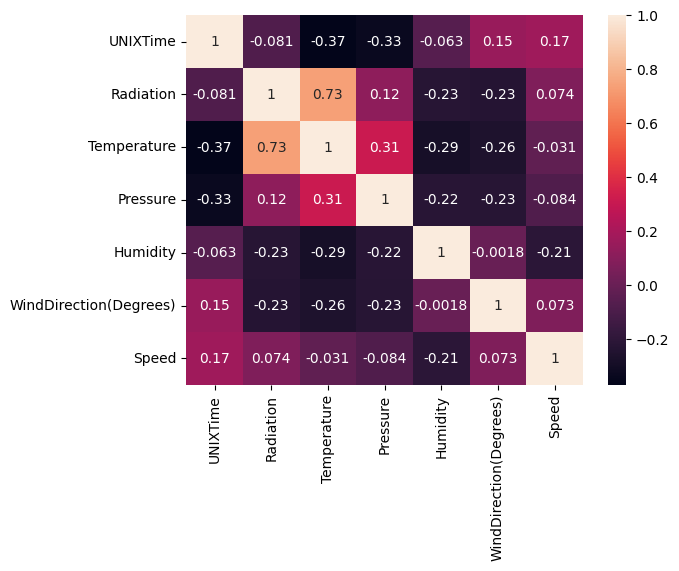

In [ ]:
sns.heatmap(df.corr(), annot = True)

From the above plot we can see how the data is correlated. The 100% correlation is shown with pastel yellow color.

## Model Building :

### Train and Test the data

#### x and y list
Since y is our target variable, so it will have only one feature i.e 'Radiaton' and X will contain all the features that will be required to predict the price.

In [ ]:
x = df[['Temperature', 'Pressure','Humidity', 'WindDirection(Degrees)', 'Speed']]
y = df['Radiation']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 101)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)

LinearRegression()

#### Linear Regression model evaluation

In [ ]:
print(linreg.intercept_)

21076.348750555342


In [ ]:
coeff_df = pd.DataFrame(linreg.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Temperature,38.229602
Pressure,-749.950175
Humidity,-0.285716
WindDirection(Degrees),-0.277390
Speed,8.443965


coeff tells us that, Holding all other features fixed, a 1 unit increase in any of the feature is associated with an increase of the given coefficient.

#### Prediction from Linear Regression model

In [ ]:
pred = linreg.predict(x_test)

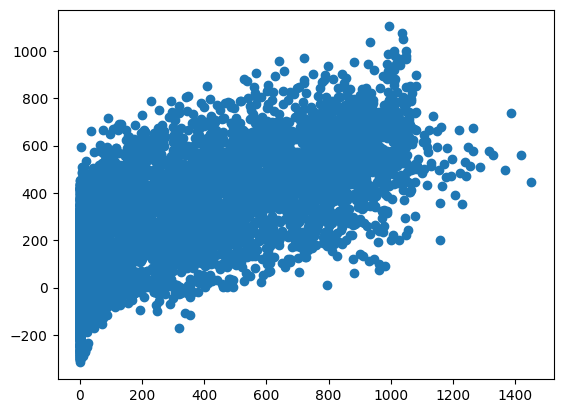

In [ ]:
plt.scatter(y_test, pred)

<ipython-input-29-a1fc3c8ba638>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50);


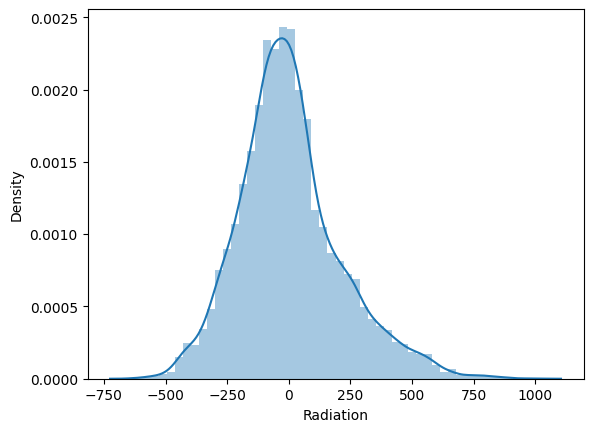

In [ ]:
sns.distplot((y_test-pred),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

#### R-Squared test

In [ ]:
ssf = np.sum((pred - y_test)**2)
ssu = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (ssf/ssu)

In [ ]:
print(R_square)

0.5662267892395486


#### Regression evaluation metrics

There are 3 common evaluation metrics for regression problems:

(i) Mean Absolute Error (MAE) (ii) Mean Squared Error (MSE) (iii) Root Mean Sqaured Error (RMSE)

All of these are loss functions because we want to minimize them

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 158.2373715913567
MSE: 43804.899353493
RMSE: 209.29620004551683


## Conclusion :

We have created a linear regression model by which we can estimate level of solar radiation.